<a href="https://colab.research.google.com/github/Tuzapeno/Atividade-Pratica-1-Derivadas/blob/main/Atividade_Pr%C3%A1tica_1_Derivadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRUPO: Arthur Neumann Salerno, Guilherme Scharwz, Eduardo Belleboni, João Pedro Aires



In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Derivada Diferenca Finita: 4.47600658981528454206
Derivada Simbólica: 4.47600684472903509459
Derivada PontoMedia: 4.47600684516658020584

Erros onde a derivada é descendente
Erro (Simbolica - Dif Finita): 0.00000025491375055253
Erro (Simbolica - PontoMedio): 0.00000000043754511125
Erro (PontoMedio - Dif Finita): 0.00000025535129566379

Erros onde a tangente é zero
X onde a tangente é igual a 0: 0.76684132767395429831
Erro (Simbolica - Dif Finita): 0.00000033306690738755
Erro (Simbolica - PontoMedio): 0.00000000444089209850
Erro (PontoMedio - Dif Finita): 0.00000032862601528905


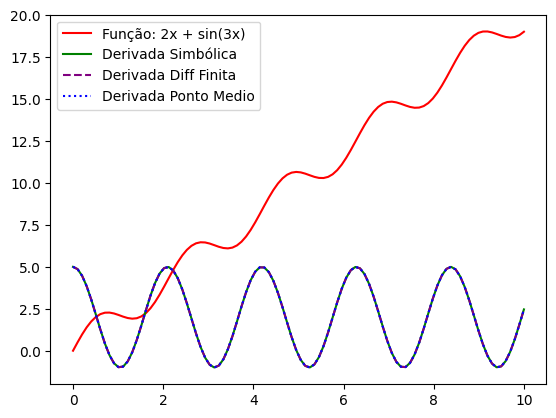

In [ ]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
from mpmath import *

mp.dps = 35
precisao = 10**-7

def f(x):
  return 2*x + np.sin(3*x)

# Simbolica
def derivadaSimbolica(x):
  return 2 + 3 * np.cos(3*x)

# Numerica
def pontoMedio(x, h):
  return (f(x + h/2) - f(x - h/2)) / h

# Numerica
def diferencaFinita(x, h):
  return (f(x + h) - f(x)) / h

# Valores de X
valoresX = [x for x in np.linspace(0, 10, 100)]

# Valores para a função
funcaoY = [f(x) for x in valoresX]

# Valores para a derivada simbólica
derivadaSimbolicaY = [derivadaSimbolica(x) for x in valoresX]

# Valores para a diferença finita
diferencaFinitaY = [diferencaFinita(x, precisao) for x in valoresX]

# Valores para ponto médio
pontoMedioY = [pontoMedio(x, precisao) for x in valoresX]

# Erros onde a derivada é descendente
erro_simbolica_finita = abs(derivadaSimbolica(0.2) - diferencaFinita(0.2, precisao))
erro_simbolica_medio = abs(derivadaSimbolica(0.2) - pontoMedio(0.2, precisao))
erro_medio_finita = abs(pontoMedio(0.2, precisao) - diferencaFinita(0.2, precisao))

print(f"Derivada Diferenca Finita: {diferencaFinita(0.2, precisao):.20f}")
print(f"Derivada Simbólica: {derivadaSimbolica(0.2):.20f}")
print(f"Derivada PontoMedia: {pontoMedio(0.2, precisao):.20f}")

# Erros onde a derivada é descendente
print()
print("Erros onde a derivada é descendente")
print(f"Erro (Simbolica - Dif Finita): {erro_simbolica_finita:.20f}")
print(f"Erro (Simbolica - PontoMedio): {erro_simbolica_medio:.20f}")
print(f"Erro (PontoMedio - Dif Finita): {erro_medio_finita:.20f}")
print()

# Encontrando o ponto onde a tangente é igual a 0
ponto_tangente = fsolve(derivadaSimbolica, 0.5) # Use um ponto inicial próximo da solução esperada

# Calculando os erros absolutos para esse ponto
tan_simb_fin = abs(derivadaSimbolica(ponto_tangente) - diferencaFinita(ponto_tangente, precisao))
tan_sim_medio = abs(derivadaSimbolica(ponto_tangente) - pontoMedio(ponto_tangente, precisao))
tan_medio_fin = abs(pontoMedio(ponto_tangente, precisao) - diferencaFinita(ponto_tangente, precisao))

# Erros onde a tangente é zero
print(f"Erros onde a tangente é zero")
print(f"X onde a tangente é igual a 0: {ponto_tangente[0]:.20f}")
print(f"Erro (Simbolica - Dif Finita): {tan_simb_fin[0]:.20f}")
print(f"Erro (Simbolica - PontoMedio): {tan_sim_medio[0]:.20f}")
print(f"Erro (PontoMedio - Dif Finita): {tan_medio_fin[0]:.20f}")

# Função
plt.plot(valoresX, funcaoY, color="red", label="Função: 2x + sin(3x)")

# Derivada Simbólica
plt.plot(valoresX, derivadaSimbolicaY, color="green", linestyle="-", label="Derivada Simbólica")

# Derivada Diferença Finita
plt.plot(valoresX, diferencaFinitaY, color="purple", linestyle="--", label="Derivada Diff Finita")

# Derivada Ponto Medio
plt.plot(valoresX, pontoMedioY, color="blue", linestyle=":", label="Derivada Ponto Medio")

# Legendas
plt.legend()





$$f(x) = 2x + \sin(3x)$$

Usando a fórmula das diferenças finitas, temos:

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

Substituindo na fórmula:

$$f'(x) \approx \frac{2(x+h) + \sin(3(x+h)) - (2x + \sin(3x))}{h}$$

Simplificando:

$$f'(x) \approx \frac{2h + \sin(3x+3h) - \sin(3x)}{h}$$

Usando a fórmula do ponto médio, temos:

$$f'(x) \approx \frac{f(x + \frac{h}{2}) - f(x - \frac{h}{2})}{h}$$

Substituindo na fórmula:

$$f'(x) \approx \frac{2(x+\frac{h}{2}) + \sin(3(x+\frac{h}{2})) - (2(x-\frac{h}{2}) + \sin(3(x-\frac{h}{2})))}{h}$$

Simplificando:

$$f'(x) \approx \frac{2h + \sin(3x+ \frac{3h}{2}) - \sin(3x - \frac{3h}{2})}{h}$$

Finalmente, usando a regra da soma e diferença da derivada e da regra do seno, temos:

$$f'(x) = \frac{d}{dx}(2x) + \frac{d}{dx}(\sin(3x))$$
$$f'(x) = 2 + 3\cos(3x)$$
